# HEART ATTACK ANALYSIS AND PREDICTION


<p ><div style=" background-color:#8fc5ff;" >
    Processes involved in data visualization and analysis are as follows ,<br>
   <b>1. Exploratory Data Analysis (EDA)</b>
    <ol><i>
        <li>Problem definition (what do we need to solve)</li>
        <li>Variable Identification (what data do we have)</li>
        <li>Missing values treatment (machine learning algorithms hates fields with missing data)</li>
        <li>Univariate Analysis (understanding each field in the dataset)</li>
        <li>Multivariate Analysis (understanding the interactions between different fields and target)</li>
       </i>
    </ol><b>2. Feature Enginerring</b>
        <ol><i>        <li>Outlier treatment</li>
                    <li>Variable transformation</li>
                <li>Variable creation</li>
                <li>Dimesionality reduction</li>
             </i>
            </ol>
    <b>3. Predictive Modeling</b></div></p>

<h2 style="color:#8fc5ff">Problem Defination</h2>
<p><div style=" background-color: #8fc5ff;"  >Heart disease is currently the leading cause of death across the globe. It is anticipated that the development of computation methods that can predict the presence of heart disease will significantly reduce heart disease caused mortalities while early detection could lead to substantial reduction in health care costs. Traditional statistical methods draw inferences from a limited number of variables obtained from experiments performed under controlled conditions. In contrast, Machine Learning methods can use a large number of often complex variables obtained from a variety of medical data banks to predict whether a patient has heart disease. Cardiovascular medicine generates a plethora of biomedical, clinical and operational data as a part of patient health care delivery, making this field ideal for the development and use of computational methods for predicting a patient has cardiac disease. Recent efforts to develop computational models capable of analysing and predicting whether a person has heart disease have shown great promise.</div></p>

<img src="https://i.guim.co.uk/img/media/f2b0671c5f3aa754f1f7c257e528aa15d2fd5d07/0_717_7000_4200/master/7000.jpg?width=445&quality=45&auto=format&fit=max&dpr=2&s=372a5c5dff4523ec7c152183426d688c"  height="500" width="500" />

<h2 style="color:#a6b9ff">Importing Libraries Required</h2>

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

<h2  style="color:#a6b9ff">Reading CSV</h2>

In [2]:
df=pd.read_csv("../input/heart-attack-analysis-prediction-dataset/heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<h2  style="color:#a6b9ff">Variable description</h2>
<pre><div style="background-color: #8fc5ff">
    Age: age in years
    Gender: gender (1 = male; 0 = female)
    Cp: chest pain type
    Value 1: typical angina
    Value 2: atypical angina
    Value 3: non-anginal pain
    Value 0: asymptomatic
    Trtbps: resting blood pressure (in mm Hg on admission to the hospital)
    Chol: serum cholesterol in mg/dl
    Fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
    Restecg: resting electrocardiographic results
    Value 0: normal
    Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 005 mV)
    Value 2: showing probable or definite left ventricular hypertropy by Estes criteria
    Thalach: maximum heart rate achieved in beats per minute (bpm)
    Exang: exercise induced angina (1 = yes; 0 = no)
    Oldpeak: ST depression induced by exercise relative to rest
    Slope: the slope of the peak exercise ST segment
    Value 1: upsloping
    Value 2: flat
    Value 3: down-sloping
    Ca: number of major vessels (0-3) colored by fluoroscopy
    Thal: 3 = normal; 6 = fixed defect; 7 = reversible defect
    The target feature has two classes and hence it is a binary classification problem. To reiterate, the goal is to predict whether a person has heart disease.
     0= less chance of heart attack 1= more chance of heart 
     
</div>
</pre>


<h2  style="color:#a6b9ff">Checking For Duplicate Values</h2>

In [3]:
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows :: ", duplicate_rows.shape)
duplicate_rows

Number of duplicate rows ::  (1, 14)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


<p style="color:Salmon" >Since we  have one duplicated row, let's drop it and cross check it.</p>

In [4]:
df = df.drop_duplicates() #drops duplicated rows
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows :: ", duplicate_rows.shape)

Number of duplicate rows ::  (0, 14)


<p style="color:Salmon">No more missing rows!!</p>

<h2  style="color:#a6b9ff">Checking For Missing Values</h2>

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

<p style="color:Salmon">Since there are no null values, we can go further with our exploration process.</p>

<h2 style="color:#a6b9ff">Univariate Analysis</h2>

<p style="color:Salmon">Let's some basic statistical details about the data set</p>

In [6]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


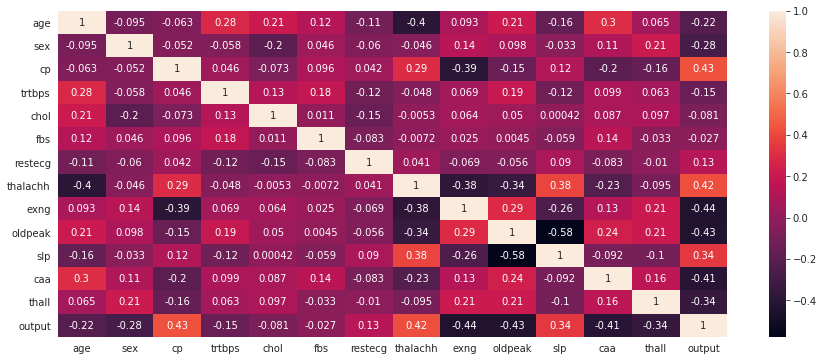

In [7]:
plt.figure(figsize= (15,6))
sns.set_style("dark")
sns.heatmap(df.corr(),annot= True)
plt.show()

In [8]:
df.output.mean()*100

54.3046357615894

Output vs Age

[Text(0.5, 1.0, 'Age distributed in the dataset ')]

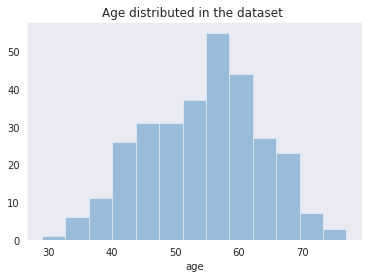

In [9]:
sns.distplot(df['age'],kde = False).set(title="Age distributed in the dataset ")

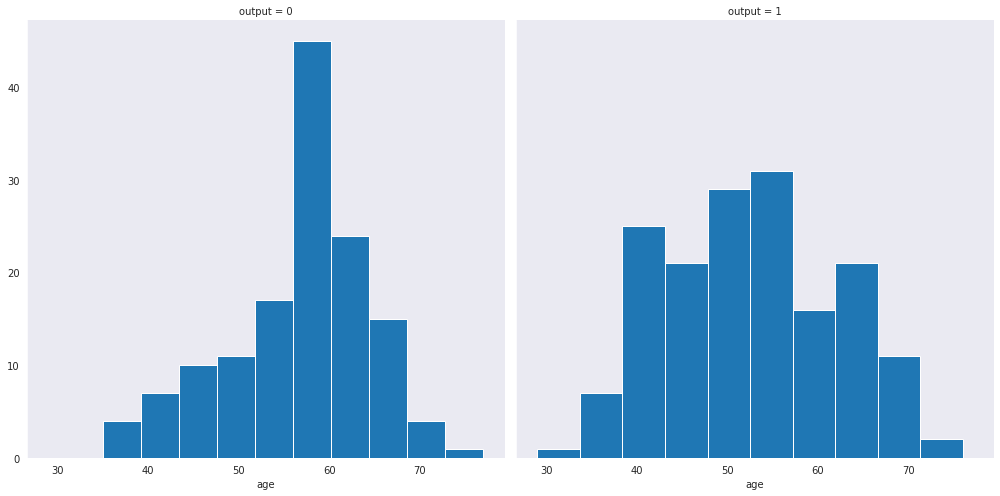

In [10]:

sns.FacetGrid(df,col='output',height=7).map(plt.hist,'age')


<p style="color:Salmon">It seems like people below the age of 57 are less prone to heart attack and people betwween the age of 55-60 are prone to have heart attack. This information may be ambiguous therefore we might go for multivariate anaysis or if it has outliers we might remove that as well.</p>

Output vs Sex

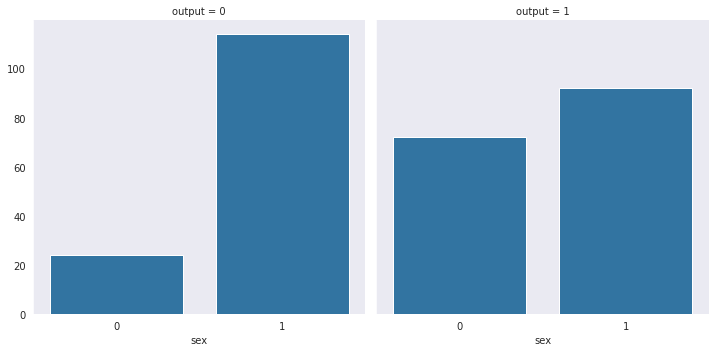

In [11]:


sns.FacetGrid(df,col='output',height=5).map(sns.countplot,'sex').add_legend()


<p style="color:Salmon">Significantly higher proportion of males were diagnosed with cardiac disease compared to females.</p>

<pre>Output vs Chest Pain type(cp)
    chest pain type
 0: typical angina
 1: atypical angina
 2: non-anginal pain
 3: asymptomatic</pre>

Text(0.5, 1.0, 'Chest pain type')

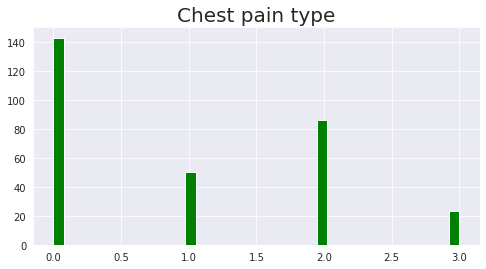

In [12]:
df['cp'].hist(color='green',bins=40,figsize=(8,4))
plt.title("Chest pain type",fontsize=20)

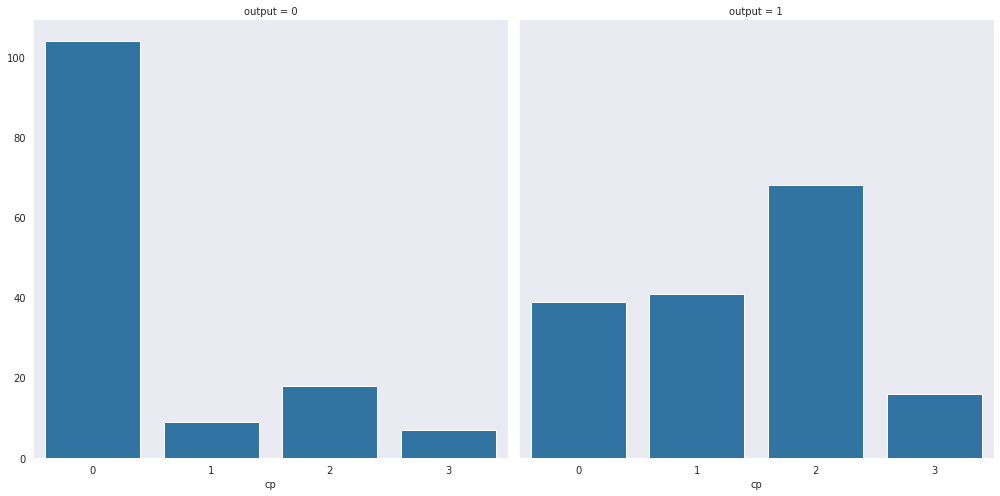

In [13]:
sns.FacetGrid(df,col='output',height=7).map(sns.countplot,'cp')

<p style="color:Salmon">People with non anginal pain are most prone to heart attack.to get a better idea we may to go for multivariate analysis</p>

<P>Output vs Resting blood pressure (in mm Hg on admission to the hospital)</P>

[Text(0.5, 1.0, 'output vs trtbps')]

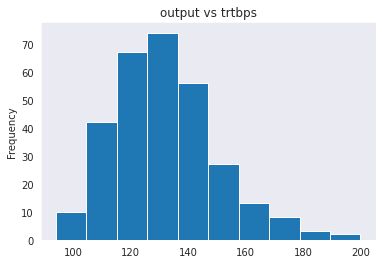

In [14]:
df.trtbps.plot.hist().set(title='output vs trtbps' )

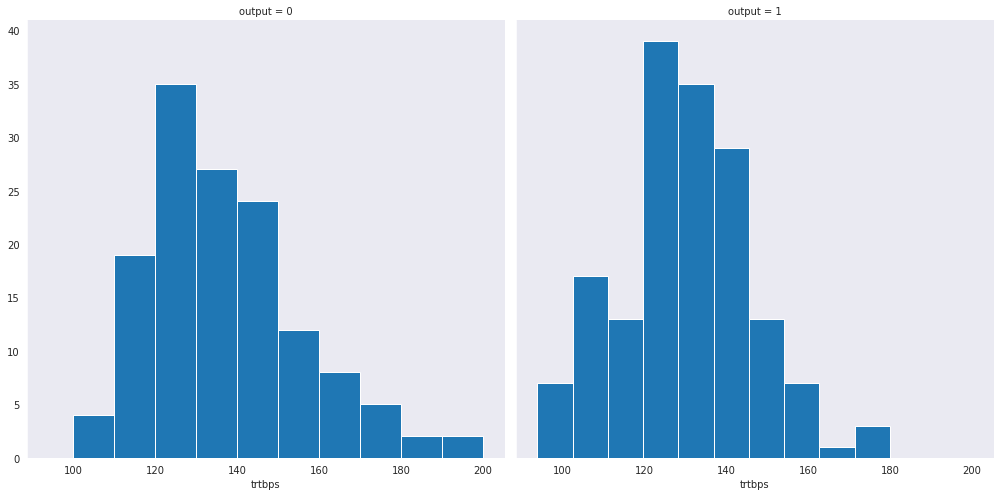

In [15]:
sns.FacetGrid(df,col='output',height=7).map(plt.hist,'trtbps')

<p style="color:Salmon">As things are not clear , we have to go for multivariate analysis by checking it with other variates</p>

<p>Output vs cholestrol</p>


(array([ 12.,  72., 106.,  69.,  35.,   3.,   4.,   0.,   0.,   1.]),
 array([126. , 169.8, 213.6, 257.4, 301.2, 345. , 388.8, 432.6, 476.4,
        520.2, 564. ]),
 <BarContainer object of 10 artists>)

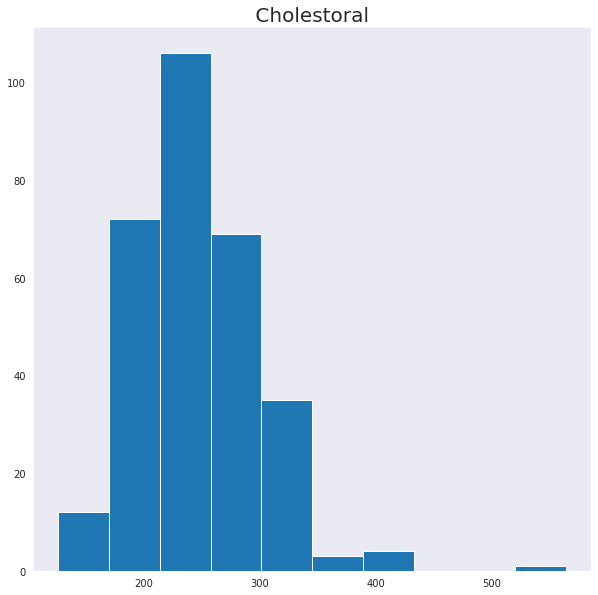

In [16]:
plt.figure(figsize=(10,10))
plt.title(" Cholestoral ",fontsize=20)
plt.hist(x='chol',data=df)

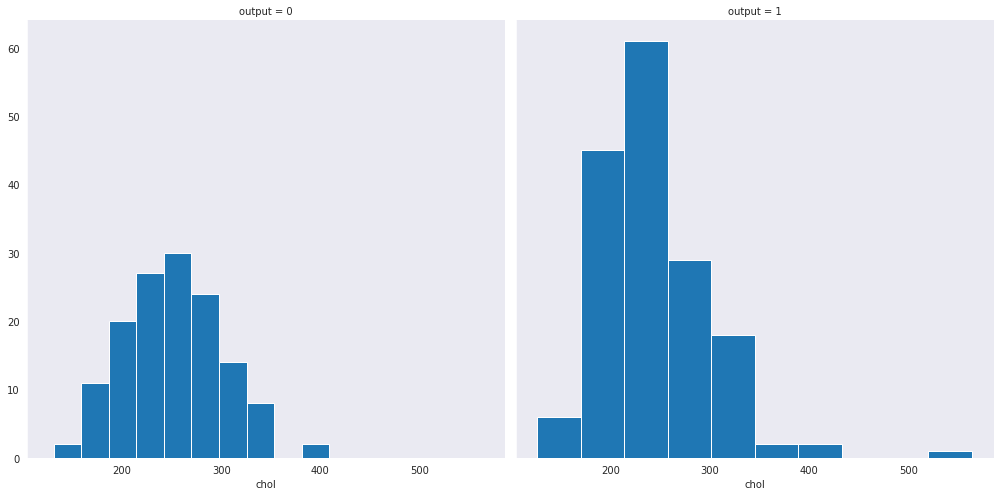

In [17]:
sns.FacetGrid(df,col='output',height=7).map(plt.hist,'chol')

<p> Output vs Fasting Blood Sugar
     Fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)<\p>

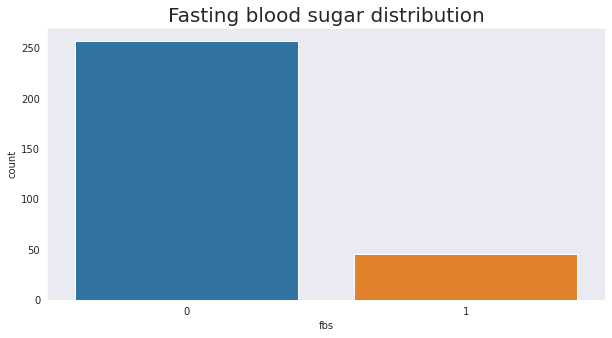

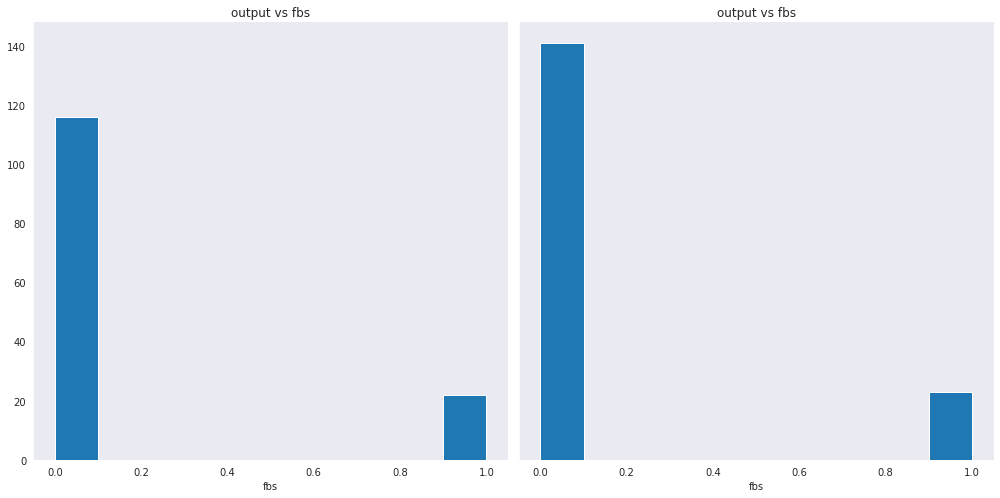

In [18]:
plt.figure(figsize=(10,5))
plt.title("Fasting blood sugar distribution",fontsize=20)
sns.countplot(df['fbs'])
sns.FacetGrid(df,col='output',height=7).map(plt.hist,'fbs').set(title="output vs fbs")


<p style="color:Salmon">Most individuals did not have fasting blood sugar levels greater than 120 mg/dL . This did not change greatly when the data was divided based on the presence of disease although a slightly higher proportion of diseased patients exhibited higher levels of blood sugar.</p>

<pre> Output vs Resting Electrocardiographic results
    Value 0: normal
    Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 005 mV)
    Value 2: showing probable or definite left ventricular hypertropy by Estes criteria</pre>

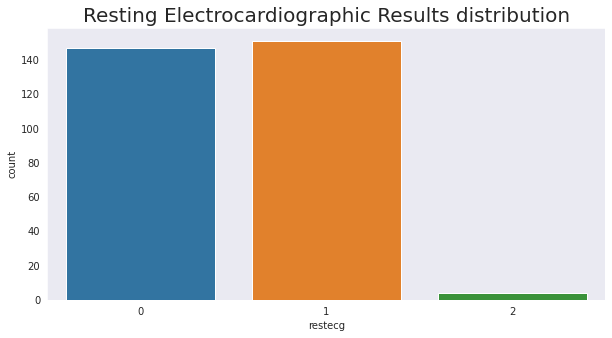

Output vs Resting Electrocardiographic result


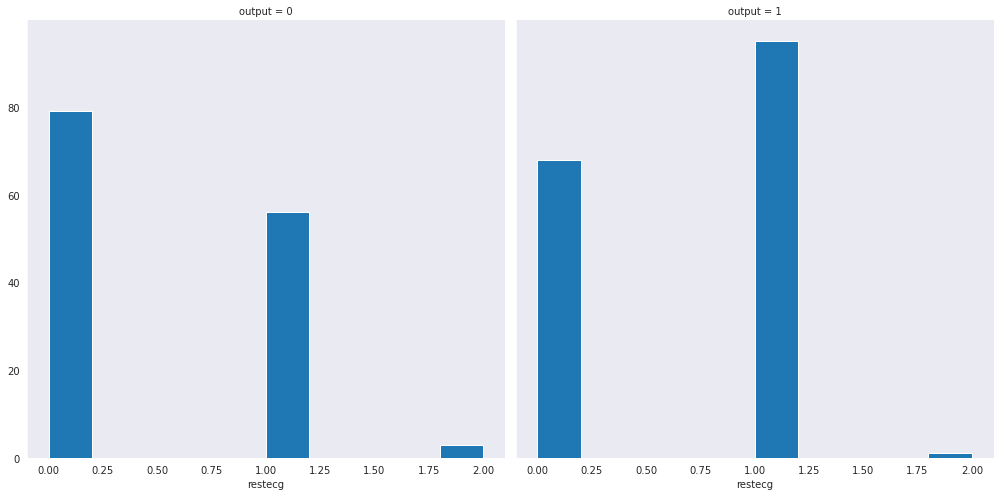

In [19]:
plt.figure(figsize=(10,5))
plt.title("Resting Electrocardiographic Results distribution",fontsize=20)
sns.countplot(df['restecg'])
plt.show()
print("Output vs Resting Electrocardiographic result")
sns.FacetGrid(df,col='output',height=7).map(plt.hist,'restecg')


<p style="color:Salmon">People showing probable or definite left ventricular hypertropy by Estes criteria have less chanes to end up with heart attack.</p>

<p>Output vs Thalachh(maximum heart rate achieved in beats per minute (bpm))</p>

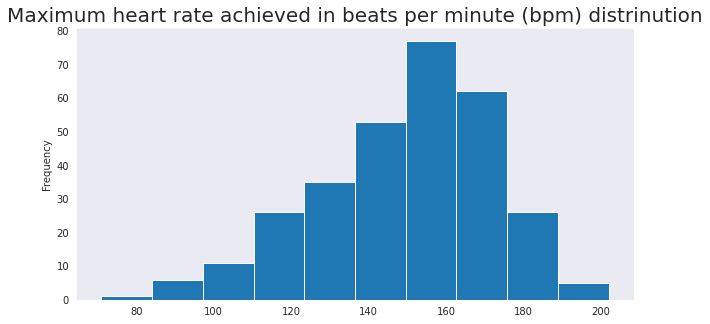

Output vs Thalachh 


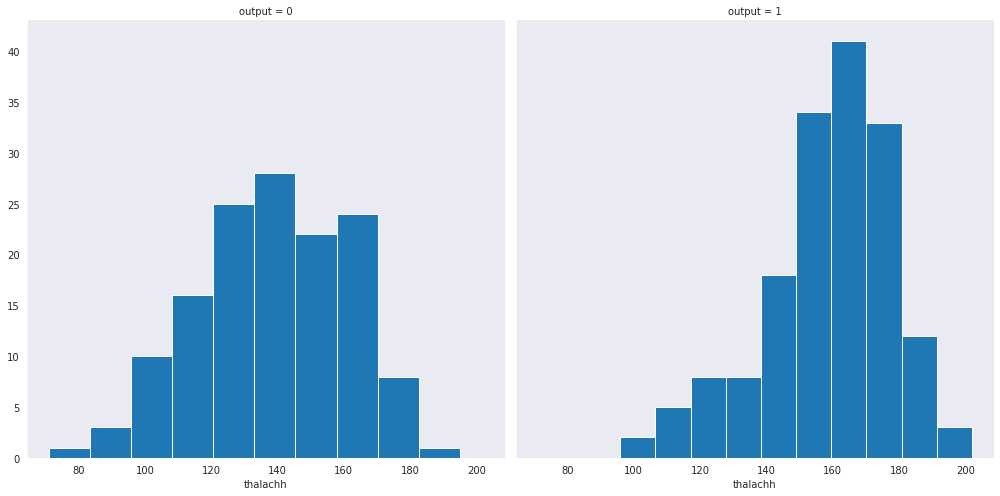

In [20]:
plt.figure(figsize=(10,5))
plt.title("Maximum heart rate achieved in beats per minute (bpm) distrinution",fontsize=20)
df.thalachh.plot.hist(df['thalachh'])
plt.show()
print("Output vs Thalachh ")
sns.FacetGrid(df,col='output',height=7).map(plt.hist,'thalachh')

<p>Output vs Excercise induced angina</p>

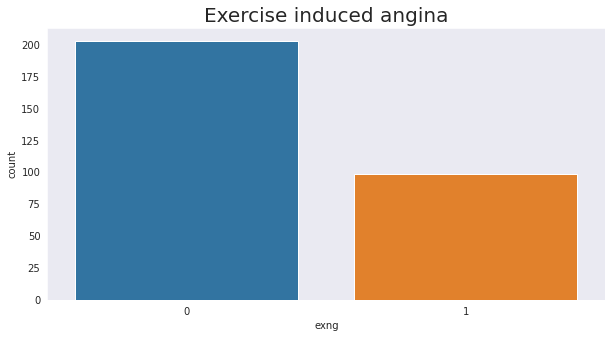

Output vs exchng 


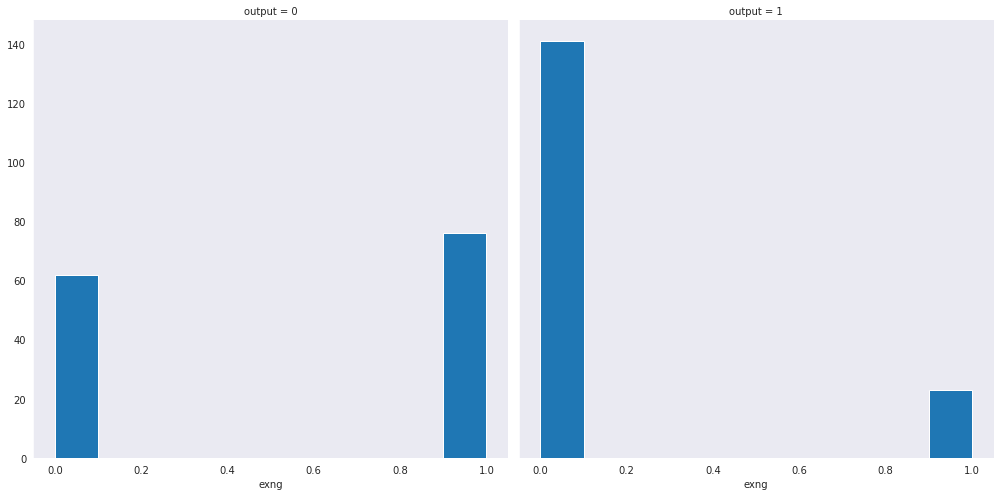

In [21]:
plt.figure(figsize=(10,5))
plt.title("Exercise induced angina",fontsize=20)
sns.countplot(df['exng'])
plt.show()
print("Output vs exchng ")
sns.FacetGrid(df,col='output',height=7).map(plt.hist,'exng')

<p style="color:Salmon">significantly more patients in the diseased cohort displayed exercise induced angina . This feature should be strongly predictive.</p>

Output vs depression induced by exercise relative to rest

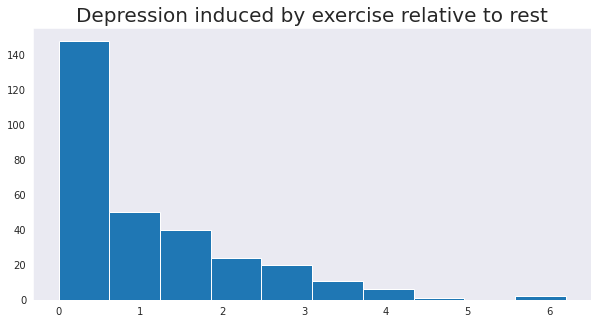

Output vs oldpeak]


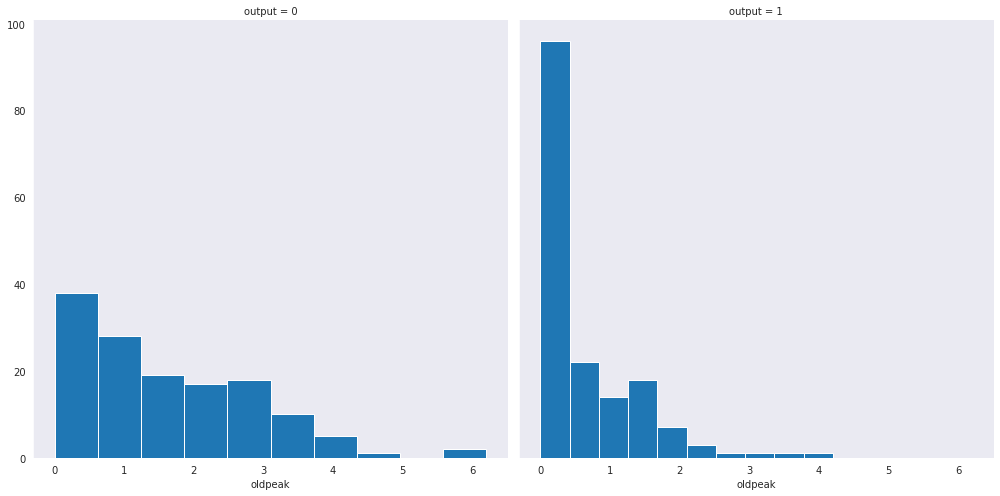

In [22]:
plt.figure(figsize=(10,5))
plt.title("Depression induced by exercise relative to rest",fontsize=20)
plt.hist(df['oldpeak'])
plt.show()
print("Output vs oldpeak]")
sns.FacetGrid(df,col='output',height=7).map(plt.hist,'oldpeak')

<pre>Output vs Slope: 
    the slope of the peak exercise ST segment
    Value 1: upsloping
    Value 2: flat
    Value 3: down-sloping
   </pre>

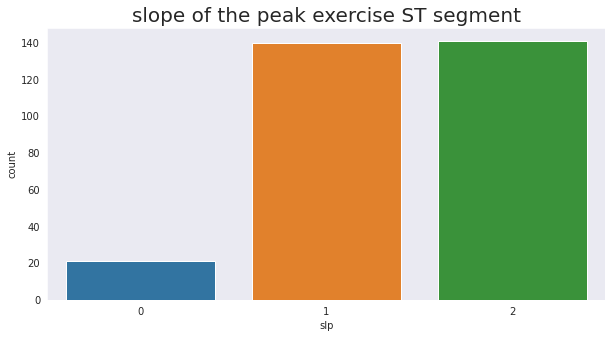

Output vs slp 


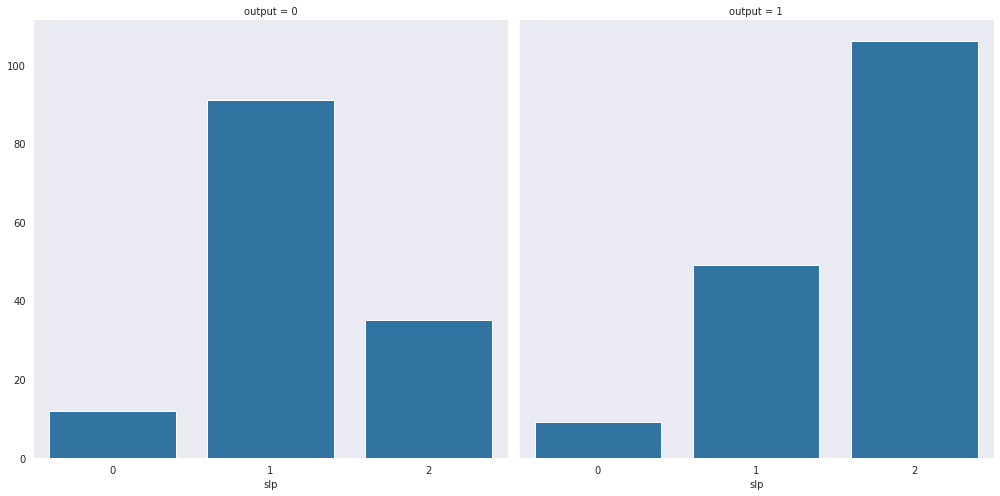

In [23]:
plt.figure(figsize=(10,5))
plt.title("slope of the peak exercise ST segment",fontsize=20)
sns.countplot(df['slp'])
plt.show()
print("Output vs slp ")
sns.FacetGrid(df,col='output',height=7).map(sns.countplot,'slp')

<p style="color:Salmon">lets check this out with ultivariate analysis</p>

<pre> Output vs Ca: number of major vessels (0-3) colored by fluoroscopy</pre>

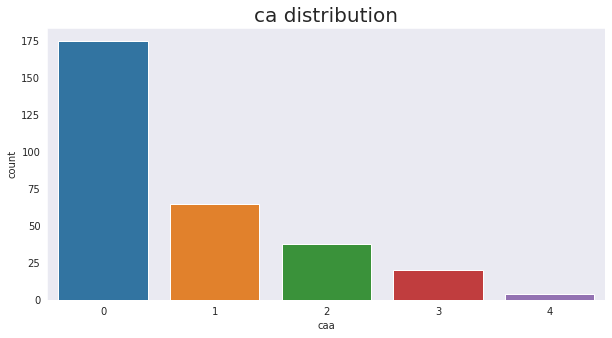

Output vs caa 


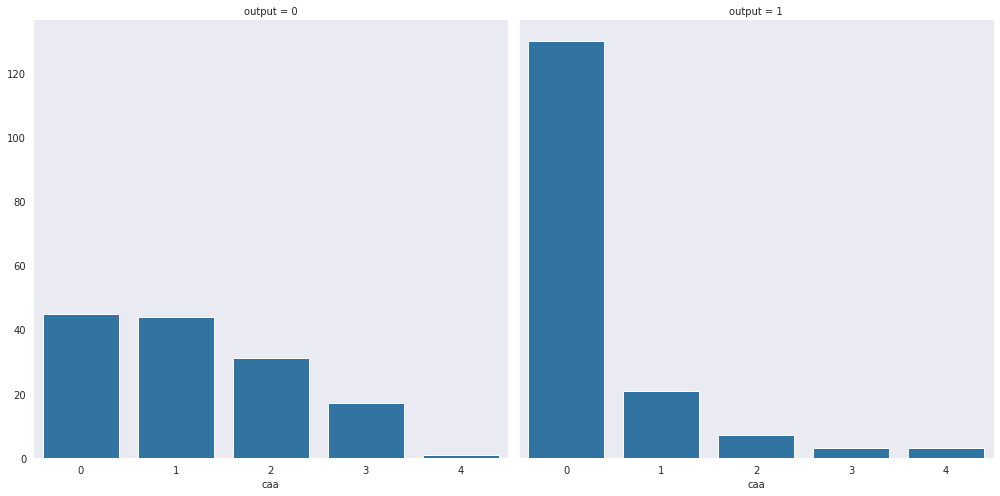

In [24]:
plt.figure(figsize=(10,5))
plt.title("ca distribution",fontsize=20)
sns.countplot(df['caa'])
plt.show()
print("Output vs caa ")
sns.FacetGrid(df,col='output',height=7).map(sns.countplot,'caa')

<pre>Output vs Thal
    3 = normal; 6 = fixed defect; 7 = reversible defect
    thal - 2 = normal; 1 = fixed defect; 3 = reversable defect</pre>

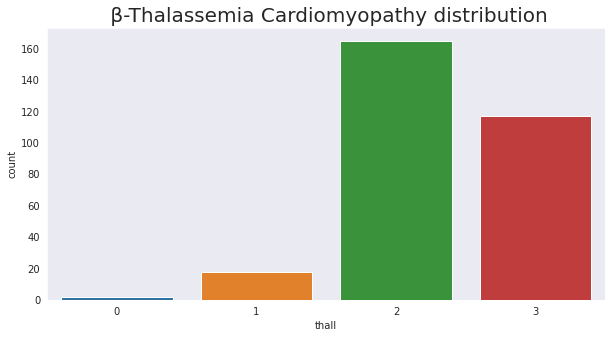

Output vs thall 


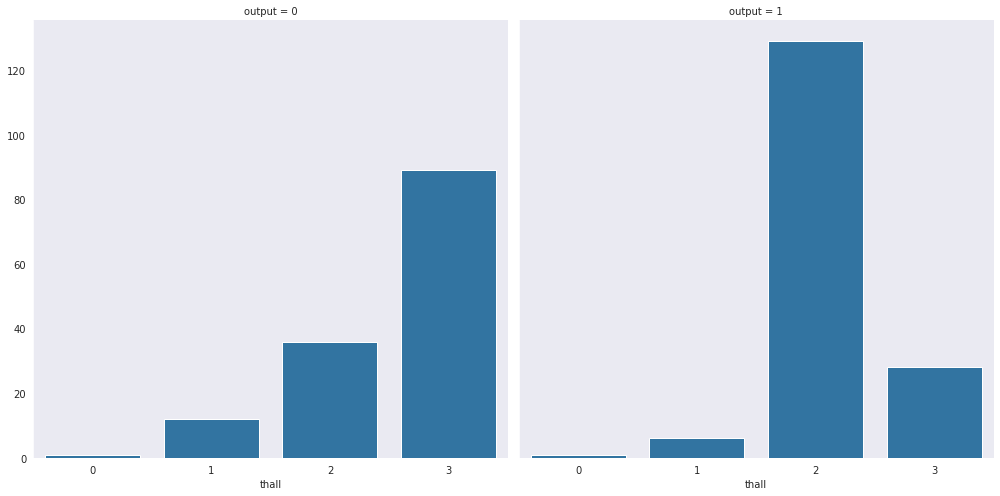

In [25]:
plt.figure(figsize=(10,5))
plt.title(" β-Thalassemia Cardiomyopathy distribution",fontsize=20)
sns.countplot(df['thall'])
plt.show()
print("Output vs thall ")
sns.FacetGrid(df,col='output',height=7).map(sns.countplot,'thall')

<h2 style="color:#a6b9ff">Multivariate analysis</h2>


Text(0.5, 1.0, 'Gender v/s Thalassemia\n')

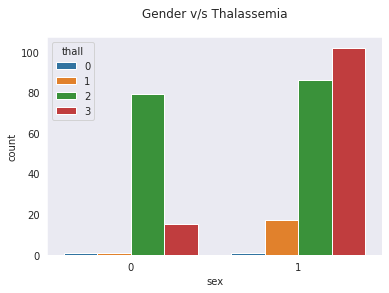

In [26]:
sns.countplot(data= df, x='sex',hue='thall')
plt.title('Gender v/s Thalassemia\n')

Text(0.5, 1.0, 'Slope v/s Target\n')

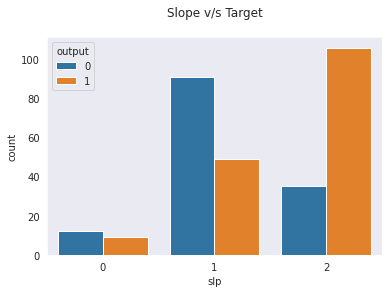

In [27]:
sns.countplot(data= df, x='slp',hue='output')
plt.title('Slope v/s Target\n')

Text(0.5, 1.0, 'exng v/s Thalassemia\n')

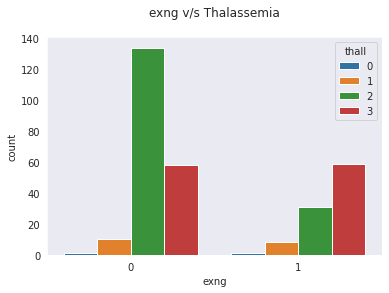

In [28]:
sns.countplot(data= df, x='exng',hue='thall')
plt.title('exng v/s Thalassemia\n')

Gender, Chest Pain Type and β-Thalassemia

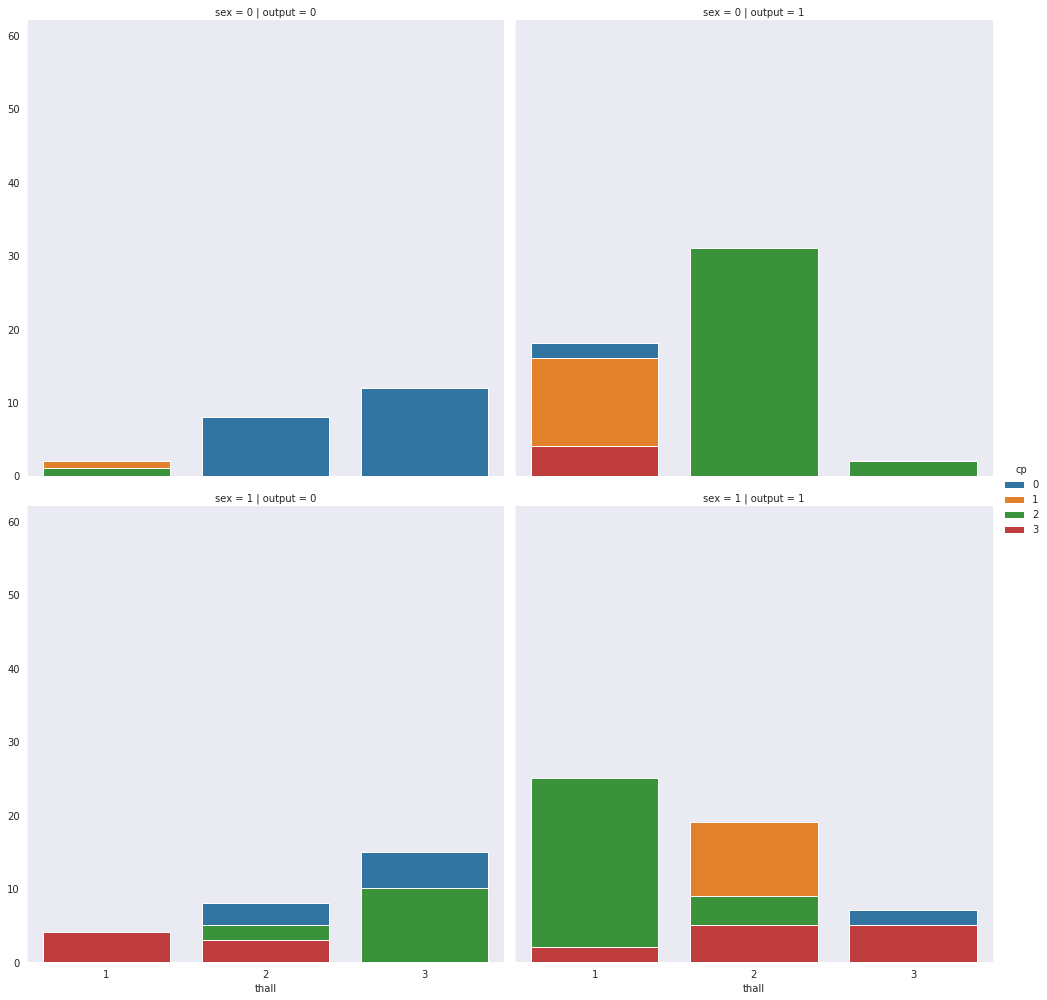

In [29]:
sns.FacetGrid(df,col='output',row='sex',hue='cp',height=7).map(sns.countplot,'thall').add_legend()

<p style="color:Salmon">Most female and male patients diagnosed with β-Thalassemia, or the reversible phenotype, and displaying signs of cardiac disease did not exhibit non-stress induced angina pain </p>

Gender, Chest Pain and Age

<Figure size 720x360 with 0 Axes>

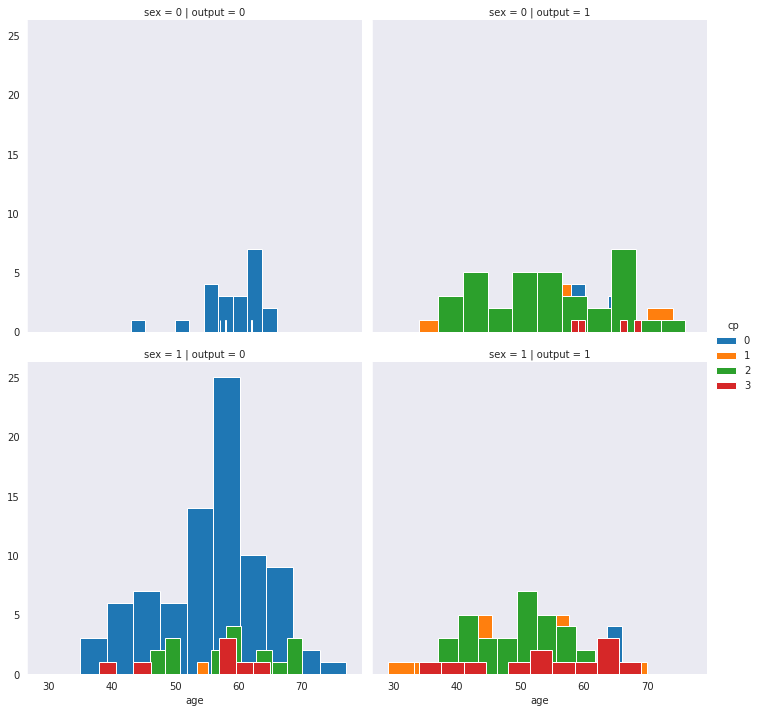

In [30]:
plt.figure(figsize=(10,5))
sns.FacetGrid(df,col='output',row='sex',hue='cp',height=5).map(plt.hist,'age').add_legend()

Gender, Chest Pain Type and Exercise Induced Angina

<Figure size 720x360 with 0 Axes>

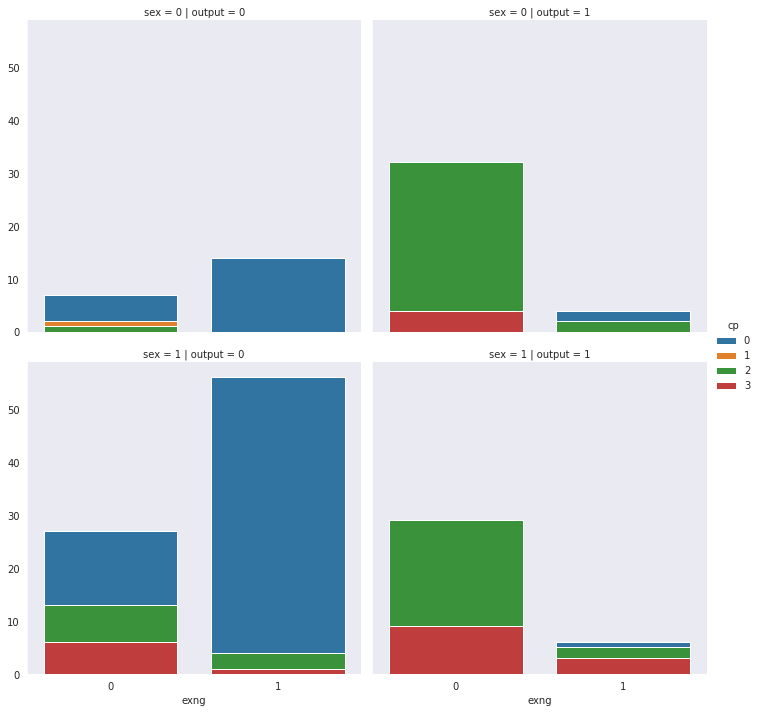

In [31]:
plt.figure(figsize=(10,5))
sns.FacetGrid(df,col='output',row='sex',hue='cp',height=5).map(sns.countplot,'exng').add_legend()

<p style="color:Salmon">Although the majority of males and females diagnosed with cardiac disease were asymptomatic for angina pain, they actually exhibit exercise induced angina pain . This added further support to the use of the exercise induced angina pain feature for the prediction of heart disease. </p>

<h2 style="color:#a6b9ff" >Feature Engineering<h2>

<h2 style="color:#a6b9ff" >Outlier detection and treatment<h2>

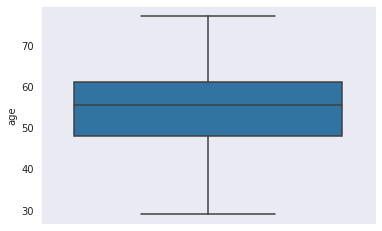

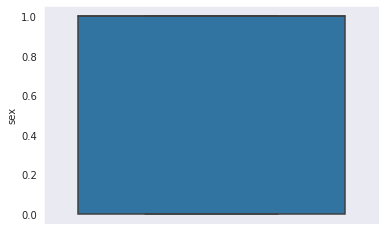

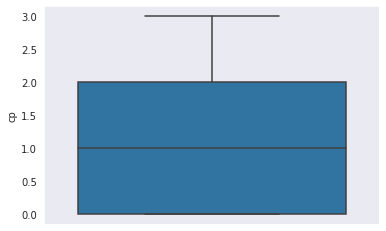

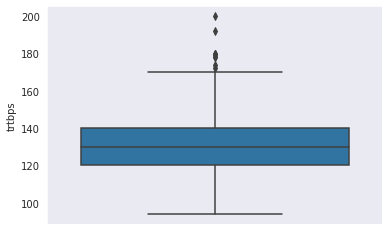

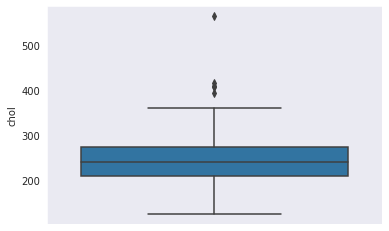

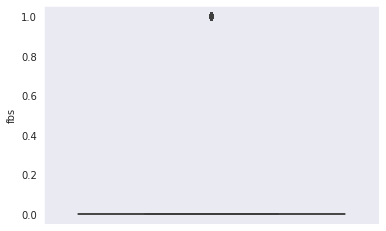

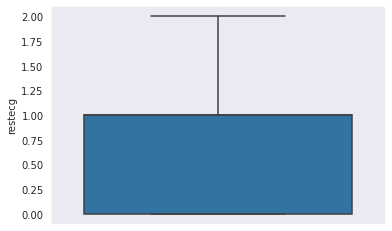

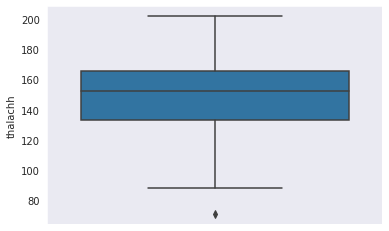

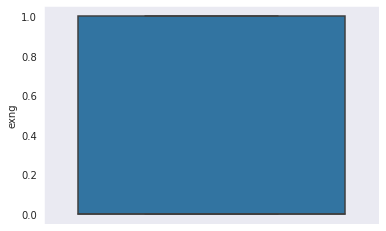

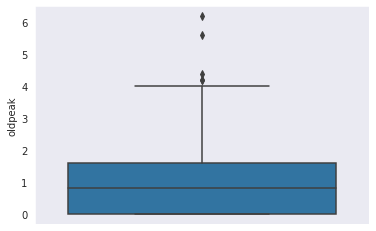

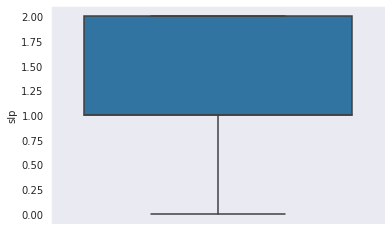

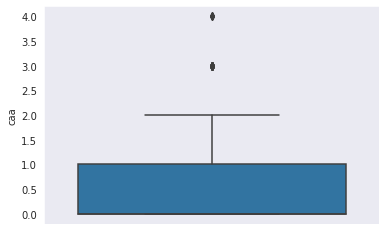

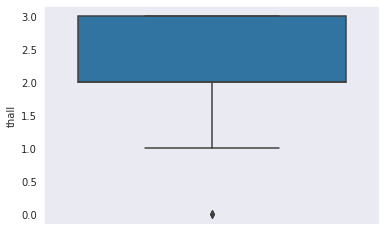

In [32]:
for i in range(0,13):
    sns.boxplot(y=df.iloc[:,i],data=df)
    plt.show()

<p style="color:Salmon">As you can see some have features have outliers . </p>

<h3  style="color:#a6b9ff">Outlier Treatment</h3>

In [33]:
#Removing outliers using Z-score
z = np.abs(stats.zscore(df))
df2 = df[(z<3).all(axis=1)]
df2.shape

(287, 14)

<AxesSubplot:ylabel='age'>

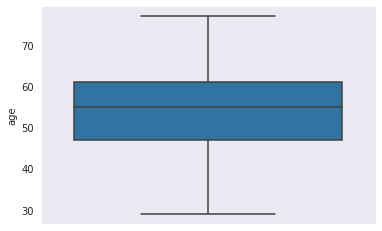

In [34]:
sns.boxplot(y=df2.age)

<AxesSubplot:>

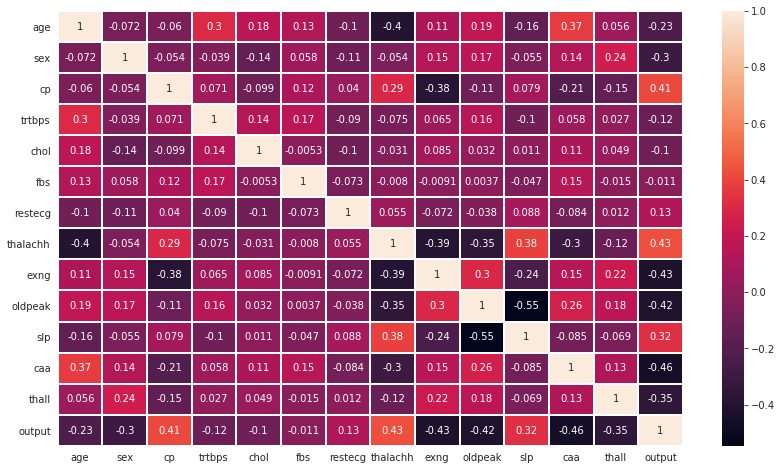

In [35]:
fig = plt.subplots(figsize=(14,8))
sns.heatmap(df2.corr(method="pearson"),annot= True,linewidth=0.1)

<AxesSubplot:>

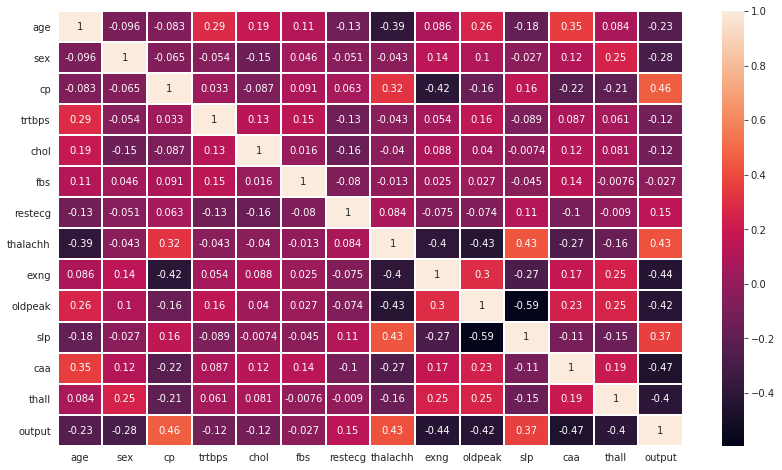

In [36]:
fig = plt.subplots(figsize=(14,8))
sns.heatmap(df.corr(method="spearman"),annot= True,linewidth=0.1)

<h2 style="color:#a6b9ff" >Converting continuous numerical values to categorical<h2>

<p style= "color:Salmon"> AGE, TRTBPS, THALACHH,OLDPEAK AND CHOL are features with continuous values. </p>

age

In [37]:
df2['age_range'] = pd.qcut(df2['age'], 3)

print(df2[["age_range", "output"]].groupby(["age_range"], as_index = False).mean().sort_values(by = "age_range", ascending = True))
df2=df2.drop(['age_range'], axis=1)


        age_range    output
0  (28.999, 51.0]  0.701923
1    (51.0, 59.0]  0.500000
2    (59.0, 77.0]  0.423529


we will hence categorize data into three groups with index 0,1 ,2

<AxesSubplot:xlabel='age_cat', ylabel='count'>

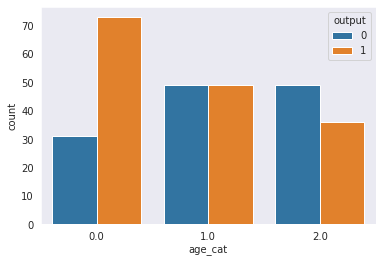

In [38]:
dfa= [df2]  
for dataset in dfa:
    dataset.loc[(dataset["age"] <= 51, "age_cat")] = 0
    dataset.loc[(dataset["age"] >51) & (dataset["age"] <= 59), "age_cat"] = 1
    dataset.loc[(dataset["age"] > 59) , "age_cat"] = 2
df2=df2.drop(['age'],axis=1)    
df2
sns.countplot(x='age_cat',data=df2,hue='output')    

trtbps

In [39]:
df2['trtbps_range'] = pd.qcut(df2['trtbps'], 3)



print(df2[["trtbps_range", "output"]].groupby(["trtbps_range"], as_index = False).mean().sort_values(by = "trtbps_range", ascending = True))
df2=df2.drop(['trtbps_range'], axis=1)

      trtbps_range    output
0  (93.999, 122.0]  0.626263
1   (122.0, 138.0]  0.546392
2   (138.0, 180.0]  0.472527


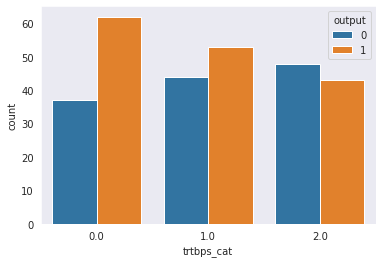

In [40]:
dfa= [df2]  
for dataset in dfa:
    dataset.loc[(dataset["trtbps"] <= 122, "trtbps_cat")] = 0
    dataset.loc[(dataset["trtbps"] > 122 ) & (dataset["trtbps"] <= 138), "trtbps_cat"] = 1
    dataset.loc[(dataset["trtbps"] > 138), "trtbps_cat"] = 2
df2
sns.countplot(x='trtbps_cat',data=df2,hue='output')  
df2=df2.drop(['trtbps'],axis=1)

chol

In [41]:
df2['chol_range'] = pd.qcut(df2['chol'], 4)



print(df2[["chol_range", "output"]].groupby(["chol_range"], as_index = False).mean().sort_values(by = "chol_range", ascending = True))
df2=df2.drop(['chol_range'], axis=1)

         chol_range    output
0  (125.999, 211.0]  0.635135
1    (211.0, 241.0]  0.585714
2    (241.0, 274.0]  0.534247
3    (274.0, 394.0]  0.442857


<AxesSubplot:xlabel='chol_cat', ylabel='count'>

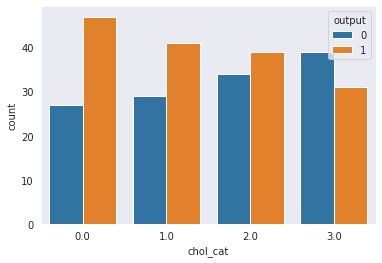

In [42]:
dfa= [df2]  
for dataset in dfa:
    dataset.loc[(dataset["chol"] <= 211, "chol_cat")] = 0
    dataset.loc[(dataset["chol"] > 211) & (dataset["chol"] <= 241), "chol_cat"] = 1
    dataset.loc[(dataset["chol"] > 241) & (dataset["chol"] <= 274), "chol_cat"] = 2
    dataset.loc[(dataset["chol"] > 274), "chol_cat"] = 3
df2=df2.drop(['chol'], axis=1)
sns.countplot(x='chol_cat',data=df2,hue='output')  

thalachh

In [43]:
df2['thalach_range'] = pd.qcut(df2['thalachh'], 3)



print(df2[["thalach_range", "output"]].groupby(["thalach_range"], as_index = False).mean().sort_values(by = "thalach_range", ascending = True))
df2=df2.drop(['thalach_range'], axis=1)

       thalach_range    output
0  (87.999, 142.333]  0.281250
1   (142.333, 162.0]  0.594059
2     (162.0, 202.0]  0.788889


,sex,cp,fbs,restecg,exng,oldpeak,slp,caa,thall,output,age_cat,trtbps_cat,chol_cat,thalach_cat
0,1,3,1,0,0,2.3,0,0,1,1,2.0,2.0,1.0,1.0
1,1,2,0,1,0,3.5,0,0,2,1,0.0,1.0,2.0,2.0
2,0,1,0,0,0,1.4,2,0,2,1,0.0,1.0,0.0,2.0
3,1,1,0,1,0,0.8,2,0,2,1,1.0,0.0,1.0,2.0
4,0,0,0,1,1,0.6,2,0,2,1,1.0,0.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,0.2,1,0,3,0,1.0,2.0,1.0,0.0
299,1,3,0,1,0,1.2,1,0,3,0,0.0,0.0,2.0,0.0
300,1,0,1,1,0,3.4,1,2,3,0,2.0,2.0,0.0,0.0
301,1,0,0,1,1,1.2,1,1,3,0,1.0,1.0,0.0,0.0


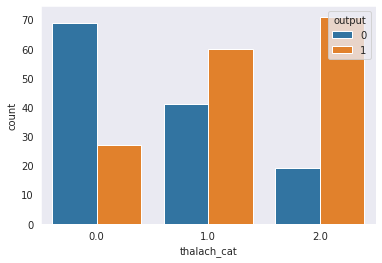

In [44]:
dfa= [df2]  
for dataset in dfa:
    dataset.loc[(dataset["thalachh"] <= 142, "thalach_cat")] = 0
    dataset.loc[(dataset["thalachh"] > 142) & (dataset["thalachh"] <= 162), "thalach_cat"] = 1
    dataset.loc[(dataset["thalachh"] > 162), "thalach_cat"] = 2
    
df2=df2.drop(['thalachh'], axis=1)
sns.countplot(x='thalach_cat',data=df2,hue='output')  
df2

oldpeak

In [45]:
df2['oldpeak_range'] = pd.qcut(df2['oldpeak'], 3)



print(df2[["oldpeak_range", "output"]].groupby(["oldpeak_range"], as_index = False).mean().sort_values(by = "oldpeak_range", ascending = True))
df2=df2.drop(['oldpeak_range'], axis=1)

   oldpeak_range    output
0  (-0.001, 0.1]  0.740000
1     (0.1, 1.4]  0.582524
2     (1.4, 4.4]  0.285714


<AxesSubplot:xlabel='oldpeak_cat', ylabel='count'>

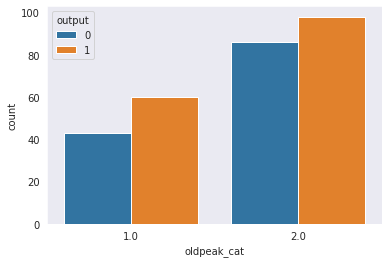

In [46]:
dfa= [df2]  
for dataset in dfa:
    dataset.loc[(dataset["oldpeak"] <= 0.1, "oldpeak_cat")] = 2
    dataset.loc[(dataset["oldpeak"] > 0.1) & (dataset["oldpeak"] <= 1.4), "oldpeak_cat"] = 1
    dataset.loc[(dataset["oldpeak"] > 1.4), "oldpeak_cat"] = 2
    
df2=df2.drop(['oldpeak'], axis=1)
sns.countplot(x='oldpeak_cat',data=df2,hue='output') 

In [47]:
df2

,sex,cp,fbs,restecg,exng,slp,caa,thall,output,age_cat,trtbps_cat,chol_cat,thalach_cat,oldpeak_cat
0,1,3,1,0,0,0,0,1,1,2.0,2.0,1.0,1.0,2.0
1,1,2,0,1,0,0,0,2,1,0.0,1.0,2.0,2.0,2.0
2,0,1,0,0,0,2,0,2,1,0.0,1.0,0.0,2.0,1.0
3,1,1,0,1,0,2,0,2,1,1.0,0.0,1.0,2.0,1.0
4,0,0,0,1,1,2,0,2,1,1.0,0.0,3.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,1,0,3,0,1.0,2.0,1.0,0.0,1.0
299,1,3,0,1,0,1,0,3,0,0.0,0.0,2.0,0.0,1.0
300,1,0,1,1,0,1,2,3,0,2.0,2.0,0.0,0.0,2.0
301,1,0,0,1,1,1,1,3,0,1.0,1.0,0.0,0.0,1.0


<h2 style="color:#a6b9ff" >Splitting variables into train and test<h2>

In [48]:
x = df2.drop(["output",'restecg'], axis=1)
y = df2["output"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=0)

In [49]:
# Using Random forest classifier
rf = RandomForestClassifier(n_estimators=69)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
print("Accuracy of Random Forest Classifier :: ", metrics.accuracy_score(y_test, y_pred_rf))


Accuracy of Random Forest Classifier ::  0.9310344827586207


Logistic Regression

In [50]:
logReg = LogisticRegression(random_state=0, solver='liblinear')
logReg.fit(x_train, y_train)
#Check accuracy of Logistic Regression
y_pred_logReg = logReg.predict(x_test)
#Model Accuracy
print("Accuracy of logistic regression classifier :: " ,metrics.accuracy_score(y_test,y_pred_logReg))


Accuracy of logistic regression classifier ::  1.0


<AxesSubplot:>

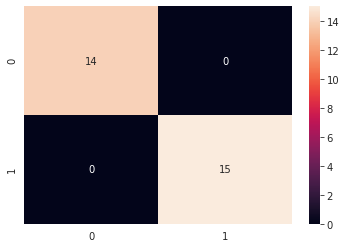

In [51]:
cm= confusion_matrix(y_test,y_pred_logReg)
sns.heatmap(cm,annot= True)

KNN

In [52]:
for n in range (1, 20, 2):
    knn = KNeighborsClassifier (n_neighbors = n)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    acc_knn = round(knn.score(x_train, y_train) * 100, 2)
    print("The accuracy with", n, "neihbors is:", acc_knn)
    
    y_pred

The accuracy with 1 neihbors is: 99.61
The accuracy with 3 neihbors is: 89.15
The accuracy with 5 neihbors is: 85.66
The accuracy with 7 neihbors is: 84.88
The accuracy with 9 neihbors is: 82.95
The accuracy with 11 neihbors is: 81.4
The accuracy with 13 neihbors is: 81.78
The accuracy with 15 neihbors is: 81.78
The accuracy with 17 neihbors is: 81.4
The accuracy with 19 neihbors is: 81.4


descision tree

In [53]:
dc= DecisionTreeClassifier()
dc.fit(x_train,y_train)
preddc= dc.predict(x_test)
metrics.accuracy_score(y_test,preddc)

0.8275862068965517

In [54]:
print("now lets see the scores togher")

models = pd.DataFrame({
    "Model": ["Random Forest","Decision Tree"  ,"Logistic Regression","KNN"],
    "Score": [ metrics.accuracy_score(y_test, y_pred_rf)*100,metrics.accuracy_score(y_test,preddc)*100 , metrics.accuracy_score(y_test,y_pred_logReg)*100, acc_knn]
})

models.sort_values(by = "Score", ascending = False)

now lets see the scores togher


,Model,Score
2,Logistic Regression,100.000000
0,Random Forest,93.103448
1,Decision Tree,82.758621
3,KNN,81.400000


therefore we conclude logistic regression is the perfect algorithm that fits this model that is trained

pls comment!this indeed was a great dataset 